In [4]:

import csv # lib for reading csvs
import pandas as pd #for processing data into a DataFrame.
import matplotlib.pyplot as plt #for plotting.
!pip install tensorflow

import tensorflow as tf

import seaborn as sns
#dont care about these for now.
import numpy as np #for numerical processing.
from sklearn.linear_model import LogisticRegression #a type of classification model.
from sklearn.model_selection import train_test_split #function useful to split data into (train|test) splits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler #scaling values.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score


In [24]:
# Load the data
solar_data = pd.read_csv("solar_weather_data.csv")

#drop the first 3 columns
solar_data = solar_data.drop(solar_data.columns[0], axis=1)
solar_data = solar_data.drop(solar_data.columns[0], axis=1)
solar_data = solar_data.drop(solar_data.columns[0], axis=1)

#print(type(solar_data))
pd.set_option('display.width', 1000)
print(solar_data.head(10))
print("\n")

            time  cloudcover   dew  humidity  precip  precipprob  solarenergy  solarradiation  sunelevation  temp  uvindex  whProduced
0  1643594400000        28.1  46.6     71.63     0.0           0          0.2              62           4.9  55.6        1          17
1  1643598000000        15.8  45.7     76.61     0.0           0          0.1              14          -6.3  52.8        0           0
2  1643601600000         8.7  47.8     85.89     0.0           0          0.1               0         -17.9  51.9        0           0
3  1643605200000         8.7  45.9     87.05     0.0           0          0.1               0         -29.8  49.6        0           0
4  1643608800000        15.8  46.6     90.75     0.0           0          0.1               0         -41.7  49.2        0           0
5  1643612400000        16.5  44.7     85.73     0.0           0          0.1               0         -53.1  48.8        0           0
6  1643616000000         8.7  44.7     91.88     0.0   

In [25]:
## Remove rows which where affected by database outages
# Remove rows where 0 whProduced and sunelevation > -1, the sun cant be up and not producing power
solar_data = solar_data.drop(solar_data[(solar_data['sunelevation'] > -1) & (solar_data['whProduced'] < 5)].index)
# Remove rows with whProduced > 5000, these are likely outliers
solar_data = solar_data.drop(solar_data[solar_data['whProduced'] > 5000].index)

In [7]:
# Convert time collumn from epoch ms to hour in day (ie 16 or 5) with time zone pacific
solar_data['time'] = pd.to_datetime(solar_data['time'], unit='ms')
solar_data['time'] = solar_data['time'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
solar_data['time'] = solar_data['time'].dt.hour

In [8]:
# print first 20 rows
print(solar_data.head(20))

    time  cloudcover   dew  humidity  precip  precipprob  solarenergy  solarradiation  sunelevation  temp  uvindex  whProduced
0     18        28.1  46.6     71.63     0.0           0          0.2              62           4.9  55.6        1          17
1     19        15.8  45.7     76.61     0.0           0          0.1              14          -6.3  52.8        0           0
2     20         8.7  47.8     85.89     0.0           0          0.1               0         -17.9  51.9        0           0
3     21         8.7  45.9     87.05     0.0           0          0.1               0         -29.8  49.6        0           0
4     22        15.8  46.6     90.75     0.0           0          0.1               0         -41.7  49.2        0           0
5     23        16.5  44.7     85.73     0.0           0          0.1               0         -53.1  48.8        0           0
6      0         8.7  44.7     91.88     0.0           0          0.1               0         -63.2  46.9      

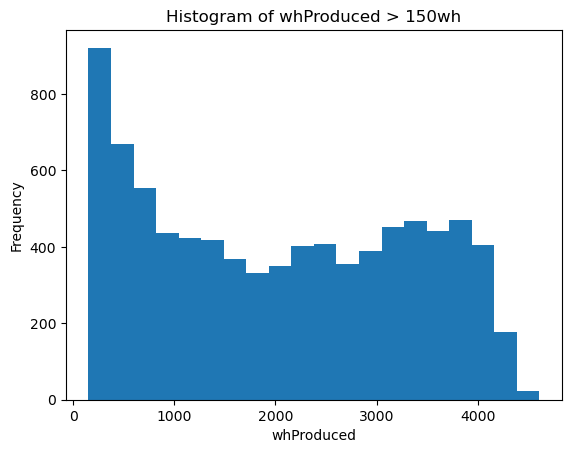

In [9]:
filtered_data = solar_data[solar_data['whProduced'] > 150]
plt.hist(filtered_data['whProduced'], bins=20)
plt.xlabel('whProduced')
plt.ylabel('Frequency')
plt.title('Histogram of whProduced > 150wh')
plt.show()

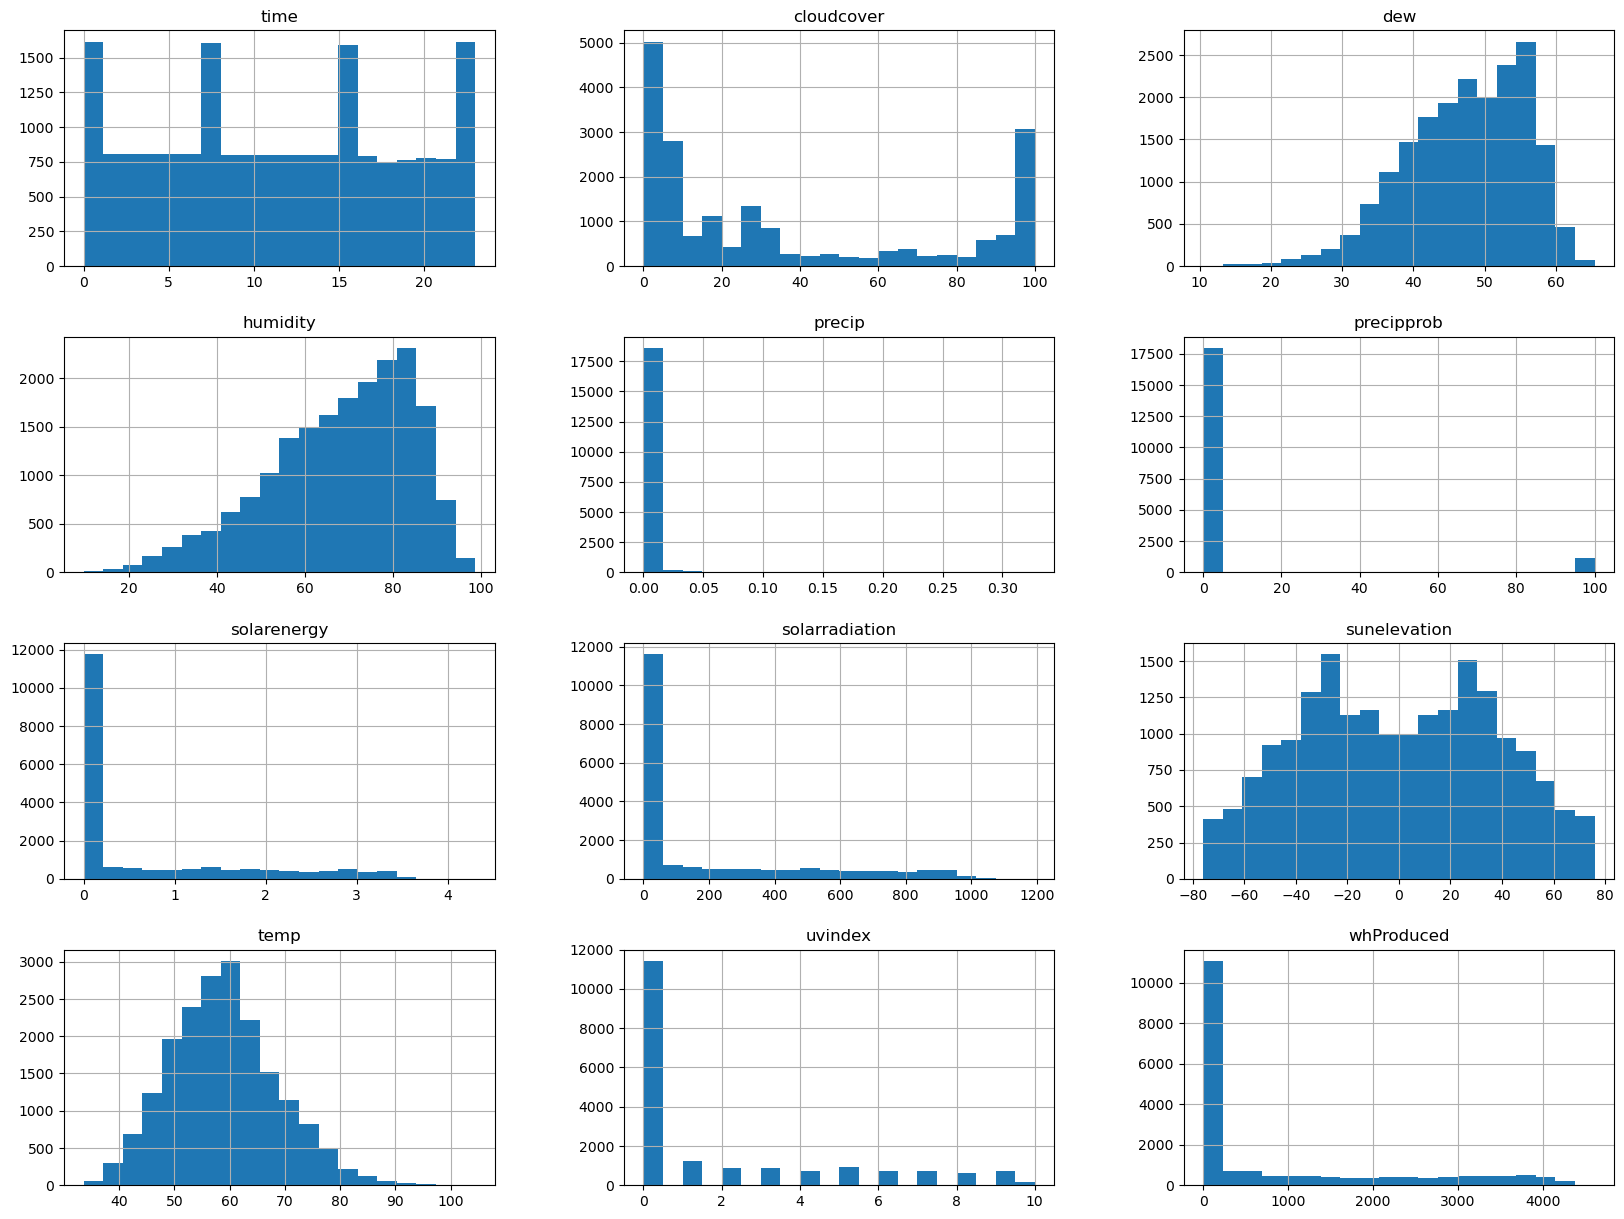

In [10]:
# Plot histograms for each of the features
solar_data.hist(bins=20, figsize=(20,15))
plt.show()

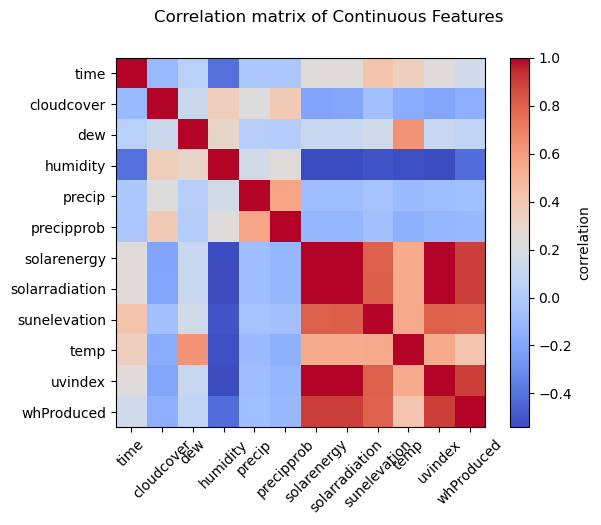

In [11]:
corrmat = solar_data.corr()
plt.imshow(corrmat, cmap='coolwarm')
plt.colorbar(label = "correlation")
plt.xticks(range(len(corrmat)), corrmat.columns, rotation=45)
plt.yticks(range(len(corrmat)), corrmat.columns)
plt.suptitle("Correlation matrix of Continuous Features")
plt.show()

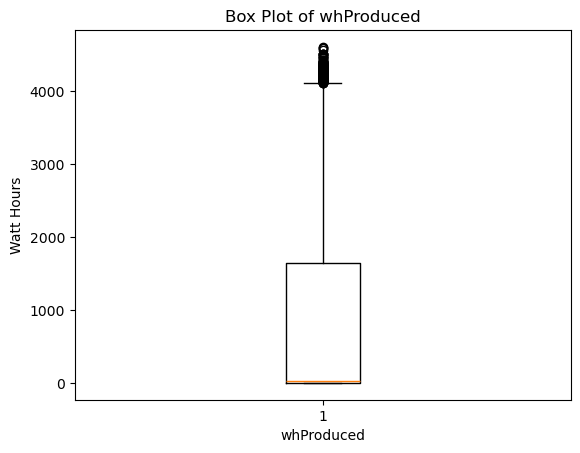

In [12]:
plt.boxplot(solar_data['whProduced'])
plt.xlabel('whProduced')
plt.ylabel('Watt Hours')
plt.title('Box Plot of whProduced')
plt.show()


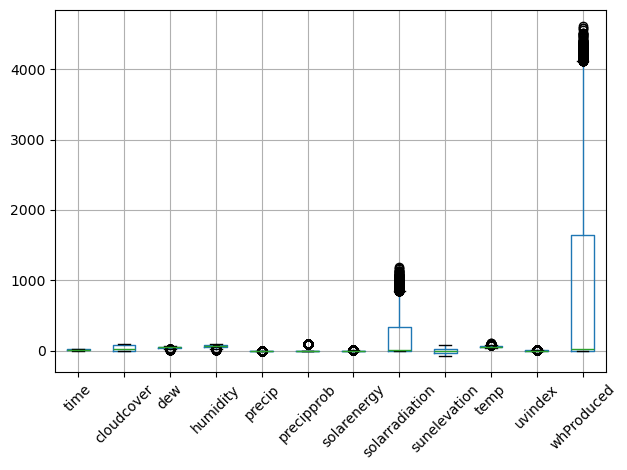

In [13]:
solar_data.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Why are the box plots so wild?!?

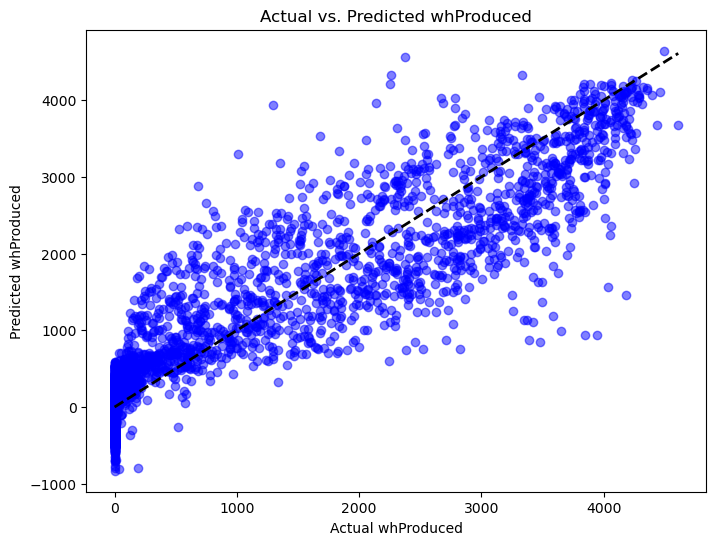

In [14]:
X = solar_data[['time', 'cloudcover', 'dew', 'humidity', 'precip', 'precipprob', 'solarenergy', 'solarradiation', 'sunelevation', 'temp', 'uvindex']]
y = solar_data['whProduced']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual whProduced')
plt.ylabel('Predicted whProduced')
plt.title('Actual vs. Predicted whProduced')
plt.show()


In [15]:
mean_predicted = np.mean(y_pred)
mean_true = np.mean(y_test)

# Bias
bias = np.mean((mean_predicted - y_test) ** 2)

# Variance
variance = np.mean((y_pred - mean_predicted) ** 2)

print("Bias:", bias)
print("Variance:", variance)

Bias: 1728956.3218738888
Variance: 1482256.6648089003


In [16]:
degree = 2  # Define the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 119756.32775437237
R-squared: 0.9307348381727596


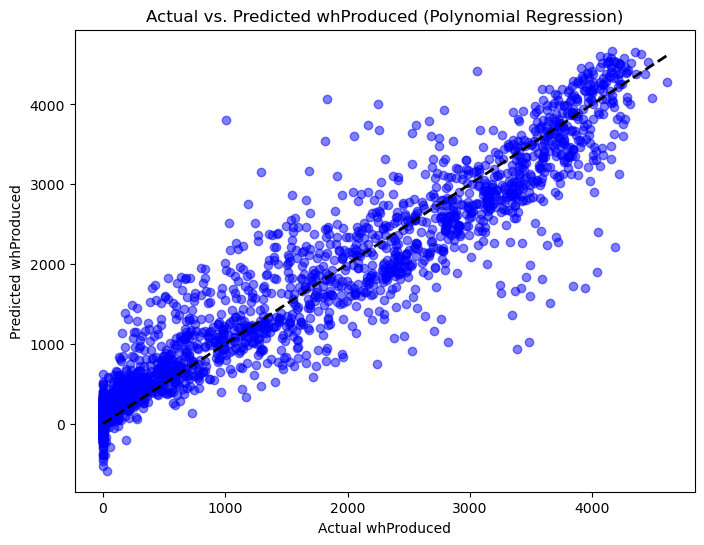

Bias: 1728956.3218738888
Variance: 1616295.8860730496


In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual whProduced')
plt.ylabel('Predicted whProduced')
plt.title('Actual vs. Predicted whProduced (Polynomial Regression)')
plt.show()
bias = np.mean((mean_predicted - y_test) ** 2)

# Variance
variance = np.mean((y_pred - mean_predicted) ** 2)
print("Bias:", bias)
print("Variance:", variance)

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define a multiplier for the IQR to determine the outlier threshold
threshold_multiplier = 1.5  # You can adjust this multiplier based on your dataset and requirements

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - threshold_multiplier * IQR
upper_bound = Q3 + threshold_multiplier * IQR

# Find indices of outliers
outlier_indices = ((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)

# Remove outliers from the training set and corresponding target variable
X_train_no_outliers = X_train[~outlier_indices]
y_train_no_outliers = y_train[~outlier_indices]

# Print the number of outliers removed
num_outliers_removed = np.sum(outlier_indices)
print("Number of outliers removed:", num_outliers_removed)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual whProduced')
plt.ylabel('Predicted whProduced')
plt.title('Actual vs. Predicted whProduced (Neural Network)')
plt.show()

bias = np.mean((mean_predicted - y_test) ** 2)

# Variance
variance = np.mean((y_pred - mean_predicted) ** 2)
print("Bias:", bias)
print("Variance:", variance)

# Transformation of skewed data

import numpy as np
import matplotlib.pyplot as plt

skewed_data=y

# Plot the histogram of skewed data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7)
plt.title('Skewed Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Apply transformations
log_transformed = np.log(skewed_data)
sqrt_transformed = np.sqrt(skewed_data)
inverse_transformed = 1 / skewed_data
exp_transformed = np.exp(skewed_data)

# Plot histograms of transformed data
plt.subplot(1, 2, 2)
plt.hist(log_transformed, bins=30, color='green', alpha=0.7, label='Log Transformation')
plt.hist(sqrt_transformed, bins=30, color='red', alpha=0.7, label='Square Root Transformation')
plt.hist(inverse_transformed, bins=30, color='purple', alpha=0.7, label='Inverse Transformation')
plt.hist(exp_transformed, bins=30, color='purple', alpha=0.7, label='Inverse Transformation')

plt.title('Transformed Data')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Number of outliers removed: 2379
Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2113398.0000 - val_loss: 381572.7188
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 308879.4062 - val_loss: 230577.8438
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 213184.1250 - val_loss: 190631.8125
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179171.3750 - val_loss: 157777.2031
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 150783.6875 - val_loss: 132238.5156
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 122065.7188 - val_loss: 115745.7812
Epoch 7/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 115755.2734 - val_loss: 107060.7969
Epoch 8/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 107297.1172 - val_loss: 102342.1562
Epoch 9/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 98869.7188 - val_loss: 101210.9766
Epoch 10/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 98147.4453 - val_loss: 98322.6875
Epoch 11/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1

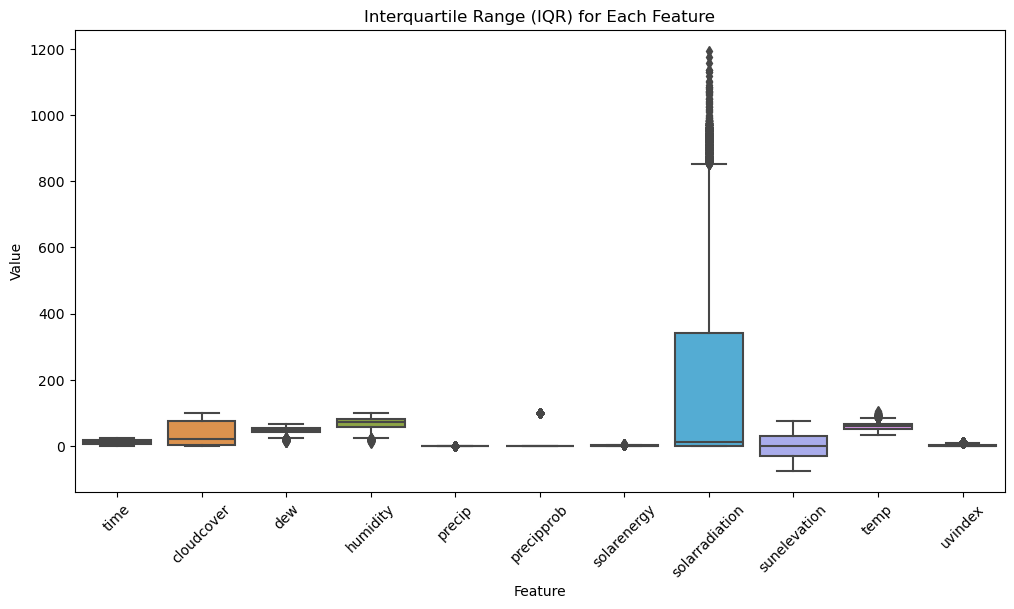

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title('Interquartile Range (IQR) for Each Feature')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()